# Data Analysis Mathematics, Algorithms and Modeling

## Team Information - **Problem Analysis Workshop 5**

**Team Members**

Name: Ayush Patel  
Student Number: 9033358

Name: Nikhil Shankar  
Student Number: 9026254

Name: Sreehari Prathap  
Student Number: 8903199


## Step 1: Install and Configure the IDE (e.g., Jupyter Notebook and VS Code)
- Install Anaconda (for Jupyter Notebook) and Visual Studio Code (VS Code).
  - Anaconda: Visit [anaconda.com](https://www.anaconda.com/products/individual) and download the appropriate installer for your operating system.
  - VS Code: Download and install from [Visual Studio Code](https://code.visualstudio.com/).
- Install Pandas Library
  - Open the terminal and run the following command: `pip install pandas`

## Step 2: Downloading the Dataset
We are using the Utrecht Fairness Recruitment dataset from [Kaggle], which can be downloaded directly via the link:
- URL: [https://www.kaggle.com/datasets/ictinstitute/utrecht-fairness-recruitment-dataset]

## Step 3 : Data Cleansing

### Data Cleansing Process for User Data (Talent Acquisition) from a CSV File

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file = "../data/Salary_Data.csv"
df_unfiltered = pd.read_csv(file)
df_unfiltered = df_unfiltered.dropna()

row_count = len(df_unfiltered)

print("Total number of datapoints(rows)", row_count)

Total number of datapoints(rows) 6698


# Differences Between Simple, Linear, Non-Linear, and Logistic Regressions

## 1. Simple Regression
- **Definition**: A regression model with **one independent variable** and one dependent variable.
- **Type**: Can be linear or non-linear.
- **Example**: Predicting house price based on area.
$$y = \beta_0 + \beta_1x + \epsilon$$

---

## 2. Linear Regression
- **Definition**: A regression model where the relationship between independent and dependent variables is **linear**.
- **Type**: Includes simple (one independent variable) and multiple (two or more independent variables).
- **Assumptions**:
  - Linearity
  - Homoscedasticity (constant variance of errors)
  - Independence of errors
  - Normally distributed errors
- **Example**: Predicting sales based on advertising spend.
- **Equation**: $$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \epsilon$$

---

## 3. Non-Linear Regression
- **Definition**: Models where the relationship between variables is **non-linear**, i.e., the dependent variable is modeled as a non-linear function of independent variables.
- **Use Case**: When data cannot be approximated well with a straight line.
- **Equation**: $$y = f(x) + \epsilon$$, where \( f(x) \) is a non-linear function.
- **Example**: Growth models, polynomial regression $$y = ax^2 + bx + c$$

---

## 4. Logistic Regression
- **Definition**: A type of regression used when the dependent variable is **categorical** (e.g., binary outcomes like "Yes/No" or "0/1").
- **Type**: Not linear in the dependent variable; the logistic function (sigmoid) maps outputs to probabilities.
- **Equation**: 
  $$[ P(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + \ldots)}}$$
  - **Example**: Predicting whether a customer will purchase a product (1) or not (0).

---

## Key Differences at a Glance

| Feature                 | Simple Regression     | Linear Regression      | Non-Linear Regression  | Logistic Regression     |
|-------------------------|-----------------------|------------------------|------------------------|-------------------------|
| **Independent Variables** | 1                   | 1 or more              | 1 or more              | 1 or more               |
| **Dependent Variable**   | Continuous           | Continuous             | Continuous             | Categorical             |
| **Relationship**         | Linear/Non-linear    | Linear                 | Non-linear             | Non-linear              |
| **Output**               | Numeric values       | Numeric values         | Numeric values         | Probability (0–1)       |
| **Use Case**             | Simple scenarios     | Predict continuous data | Complex patterns       | Classification problems |


In [2]:
def plot_scatter_diagram(df, dependent_column_name):
    fig, axes = plt.subplots(4, int((len(df.columns)/4) + 1),figsize=(15,15))
    for i, col_name in enumerate(df.columns):
        print(i)
        if col_name != dependent_column_name:
            sns.scatterplot(x=col_name, y=dependent_column_name, data=df, ax=axes[i%4, i//4])
    plt.tight_layout()
    plt.show()

def  plot_histogram_2(self):
        fig,axes = plt.subplots(4, int(len(self.df.columns)//4)+1, figsize=(15,15))
        for i, col_name in enumerate(self.df.columns):
            axes[i%4, i//4].hist(self.df[col_name], bins=100)
            axes[i%4, i//4].set_xlabel(col_name)
            axes[i%4, i//4].set_ylabel('Frequency')
        plt.tight_layout()
        plt.show()

def plot_histogram(df, logscale=True):
    numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
    print(numeric_columns)
    fig,axes = plt.subplots(1, 3, figsize=(15,5))
    for i, col_name in enumerate(numeric_columns):
        if(logscale):
            axes[i%3].set_yscale('log')
        axes[i%3].hist(df[col_name], bins=100)
        axes[i%3].set_xlabel(col_name)
        axes[i%3].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

def min_max_scale(df):
    scaled_df = df.copy()
    # Apply Min-Max scaling to numeric columns
    for column in scaled_df.select_dtypes(include='number').columns:
        min_val = scaled_df[column].min()
        max_val = scaled_df[column].max()

        # Scale the column
        scaled_df[column] = (scaled_df[column] - min_val) / (max_val - min_val)

    return scaled_df

#### **Scatter plots for identifying relationships**

In [3]:
df_unfiltered.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


0
1
2
3
4
5


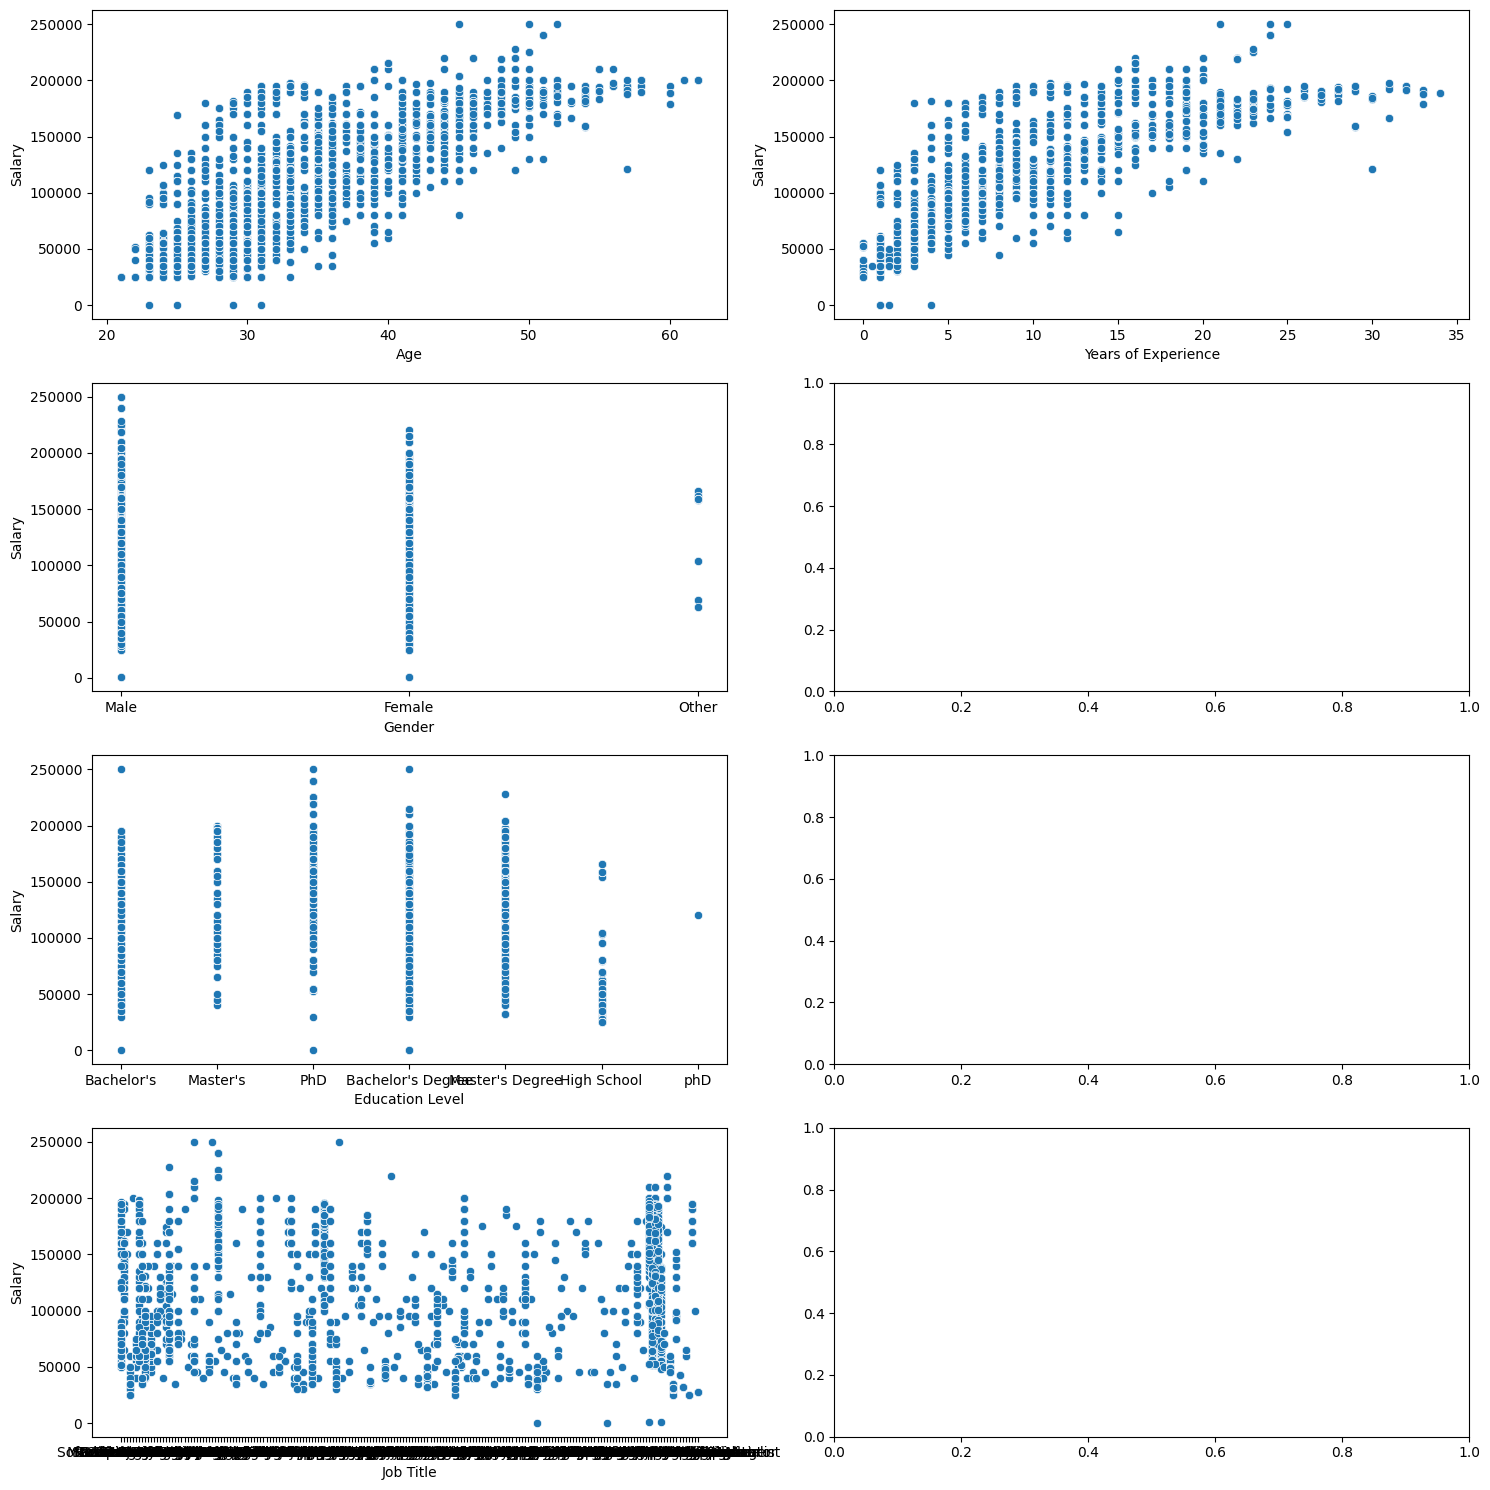

In [4]:
# We are using seaborn to plot scatter plots
import seaborn as sns
plot_scatter_diagram(df_unfiltered, 'Salary')

#### **Histogam Plot**

['Age', 'Years of Experience', 'Salary']


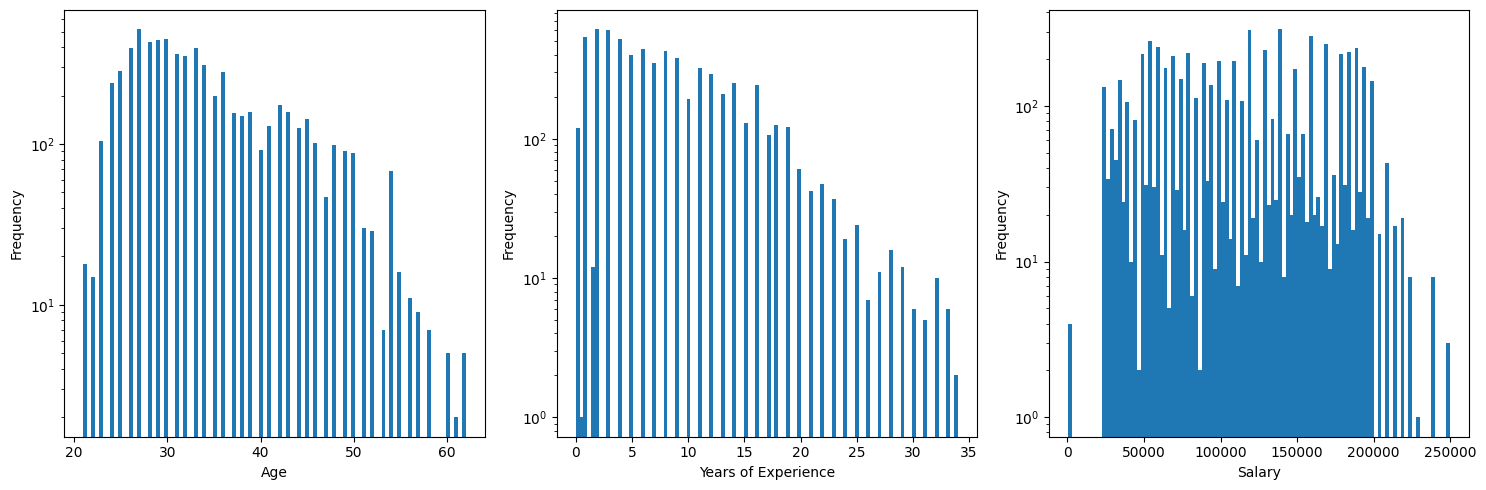

In [5]:
plot_histogram(df_unfiltered)

#### **Normalizing numerical columns** 

In [6]:
scaled = min_max_scale(df_unfiltered)

#### **Polynomial Regression**

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm

class PolynomialRegression:
    def __init__(self, degree=2, test_size=0.2, random_state=42):
        """
        Initialize the PolynomialRegression class.

        Parameters:
        - degree (int): Degree of the polynomial regression. Default is 2.
        - test_size (float): Proportion of data for testing. Default is 0.2.
        - random_state (int): Random state for reproducibility. Default is 42.
        """
        self.degree = degree
        self.test_size = test_size
        self.random_state = random_state
        self.model = LinearRegression()
        self.poly = PolynomialFeatures(degree=self.degree)
        self.metrics = {}
    
    def split_data(self, df, feature_cols, target_col, feature_name, target_name):
        """
        Split the data into training and testing sets.

        Parameters:
        - df (pd.DataFrame): Input DataFrame.
        - feature_cols (list): List of feature column names.
        - target_col (str): Target column name.

        Returns:
        None
        """
        self.feature_cols = feature_cols
        self.target_col = target_col
        self.feature_name = feature_name
        self.target_name = target_name
        self.X = df[feature_cols].to_numpy().reshape(-1, 1)
        self.y = df[target_col].to_numpy().reshape(-1, 1)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=self.test_size, random_state=self.random_state
        )

    def split_data_andbased_on_gender(self, df, feature_cols, target_col, feature_name, target_name):
        self.split_data(df, feature_cols, target_col, feature_name, target_name)
        self.fit()
        self.plot_regression()
        self.get_metrics()
        self.stats_model()

    def fit(self):
        """
        Fit the polynomial regression model to the training data.

        Returns:
        None
        """
        self.X_train_poly = self.poly.fit_transform(self.X_train)
        self.X_test_poly = self.poly.transform(self.X_test)
        
        self.model.fit(self.X_train_poly, self.y_train)
        
        # Training and testing predictions
        self.y_train_pred = self.model.predict(self.X_train_poly)
        self.y_test_pred = self.model.predict(self.X_test_poly)
        
        # Calculate RMSE
        self.metrics['train_rmse'] = np.sqrt(mean_squared_error(self.y_train, self.y_train_pred))
        self.metrics['test_rmse'] = np.sqrt(mean_squared_error(self.y_test, self.y_test_pred))
    
    def plot_regression(self):
        # Define a smooth range of values for plotting the perfect regression line
        self.X_range = np.linspace(min(self.X_train), max(self.X_train), 100)

        # Compute the perfect regression line using the model
        # For polynomial regression, evaluate the model at X_range
        self.X_range_poly = self.poly.transform(self.X_range)  # Transform the feature to polynomial space
        self.y_range_pred = self.model.predict(self.X_range_poly)  # Predict the target values

        # Plot training data and the perfect regression line
        plt.figure(figsize=(10, 6))
        plt.scatter(self.X_train, self.y_train, color='blue', label='Train Data')
        plt.plot(self.X_range, self.y_range_pred, color='darkblue', label='Perfect Regression Line (Train)', linewidth=2)

        # Plot testing data and regression line (for visualization purposes)
        plt.scatter(self.X_test, self.y_test, color='red', label='Test Data')
        plt.title(f"Polynomial Regression (Degree: {self.degree})")
        plt.xlabel(self.feature_name)
        plt.ylabel(self.target_name)
        plt.legend()
        plt.show()
    
    def get_metrics(self):
        """
        Return the performance metrics (RMSE for train and test).

        Returns:
        - dict: RMSE metrics for training and testing sets.
        """
        print("Train RMSE:", self.metrics["train_rmse"])
        print("Test RMSE:", self.metrics["test_rmse"])
        return self.metrics


    def stats_model(self):
        X_mlr_const_2 = sm.add_constant(self.X_train_poly)
        mlr_model_2 = sm.OLS(self.y_train_pred, X_mlr_const_2).fit()
        print(mlr_model_2.summary())


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,0.268293,Male,Bachelor's,Software Engineer,0.147059,0.359103
1,0.170732,Female,Master's,Data Analyst,0.088235,0.258963
2,0.585366,Male,PhD,Senior Manager,0.441176,0.599439
3,0.365854,Female,Bachelor's,Sales Associate,0.205882,0.238935
4,0.756098,Male,Master's,Director,0.588235,0.799720


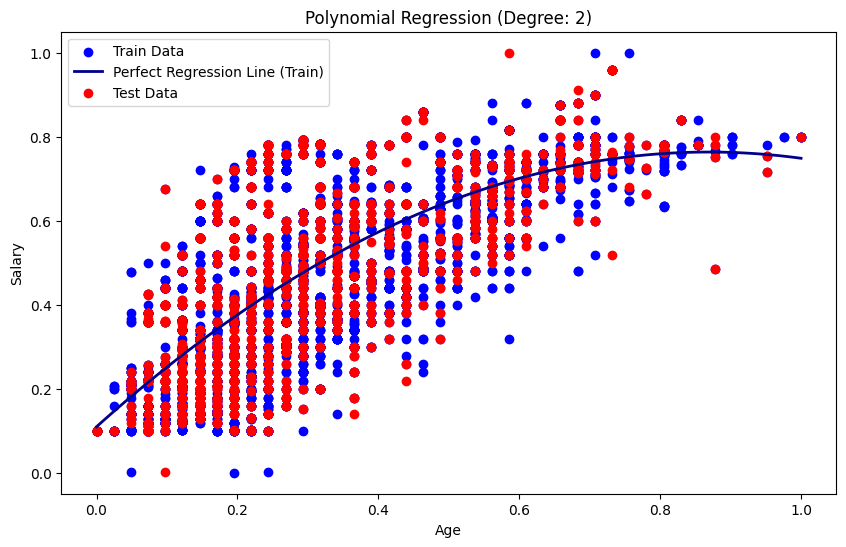

Train RMSE: 0.1403586552729926
Test RMSE: 0.1417549578552825
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.174e+30
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        03:03:23   Log-Likelihood:             1.6665e+05
No. Observations:                5358   AIC:                        -3.333e+05
Df Residuals:                    5355   BIC:                        -3.333e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

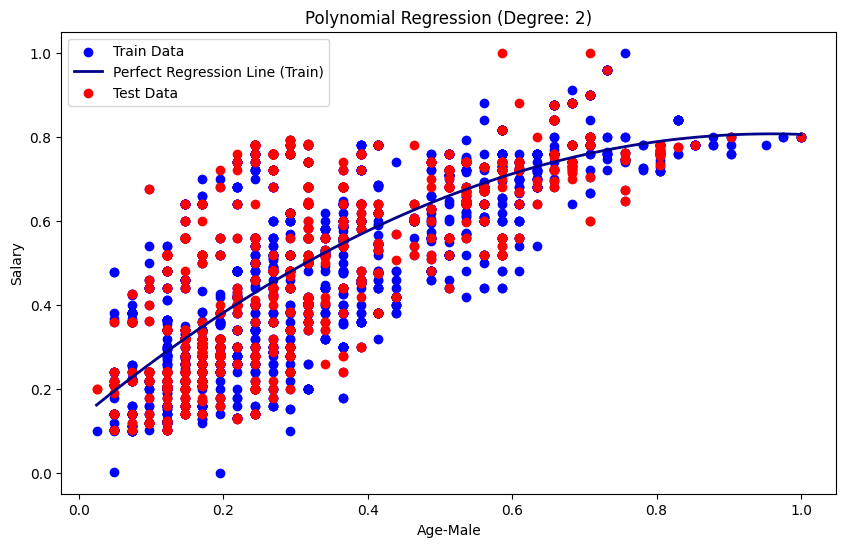

Train RMSE: 0.1314588446305369
Test RMSE: 0.13836368736119645
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.431e+32
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        03:03:23   Log-Likelihood:                 99940.
No. Observations:                2936   AIC:                        -1.999e+05
Df Residuals:                    2933   BIC:                        -1.999e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

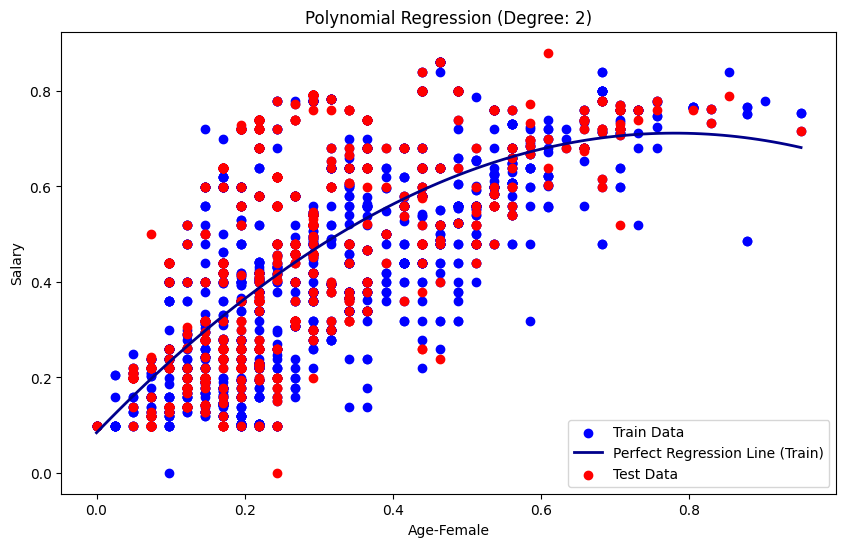

Train RMSE: 0.14674687444590098
Test RMSE: 0.15678537758795635
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.512e+30
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        03:03:23   Log-Likelihood:                 76344.
No. Observations:                2410   AIC:                        -1.527e+05
Df Residuals:                    2407   BIC:                        -1.527e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

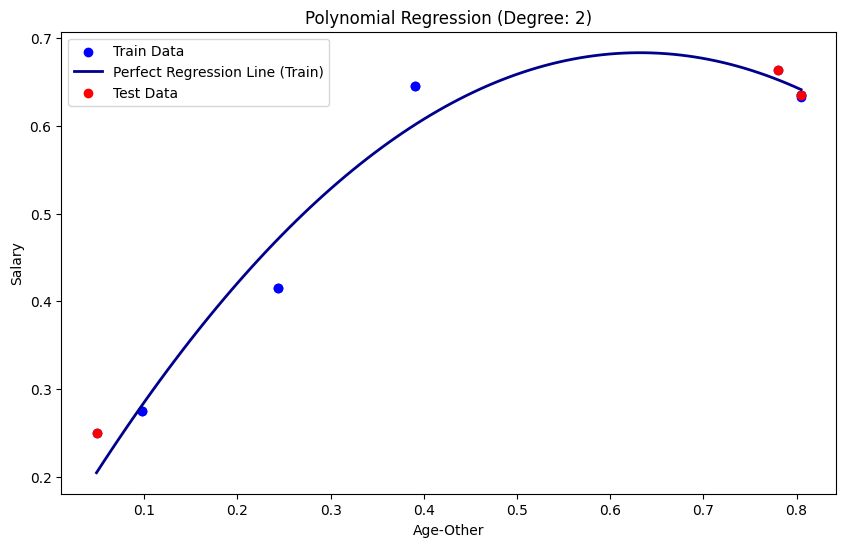

Train RMSE: 0.033738515054851835
Test RMSE: 0.02749158740649218
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.438e+30
Date:                Thu, 28 Nov 2024   Prob (F-statistic):          5.98e-119
Time:                        03:03:23   Log-Likelihood:                 378.72
No. Observations:                  11   AIC:                            -751.4
Df Residuals:                       8   BIC:                            -750.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [8]:
poly_reg = PolynomialRegression(degree=2)
display(scaled.head())
poly_reg.split_data_andbased_on_gender(scaled, 'Age', 'Salary', 'Age', 'Salary')
poly_reg.split_data_andbased_on_gender(scaled[scaled['Gender'] == 'Male'], 'Age', 'Salary', 'Age-Male', 'Salary')
poly_reg.split_data_andbased_on_gender(scaled[scaled['Gender'] == 'Female'], 'Age', 'Salary', 'Age-Female', 'Salary')
poly_reg.split_data_andbased_on_gender(scaled[~scaled['Gender'].isin(['Male', 'Female'])], 'Age', 'Salary', 'Age-Other', 'Salary')


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,0.268293,Male,Bachelor's,Software Engineer,0.147059,0.359103
1,0.170732,Female,Master's,Data Analyst,0.088235,0.258963
2,0.585366,Male,PhD,Senior Manager,0.441176,0.599439
3,0.365854,Female,Bachelor's,Sales Associate,0.205882,0.238935
4,0.756098,Male,Master's,Director,0.588235,0.799720


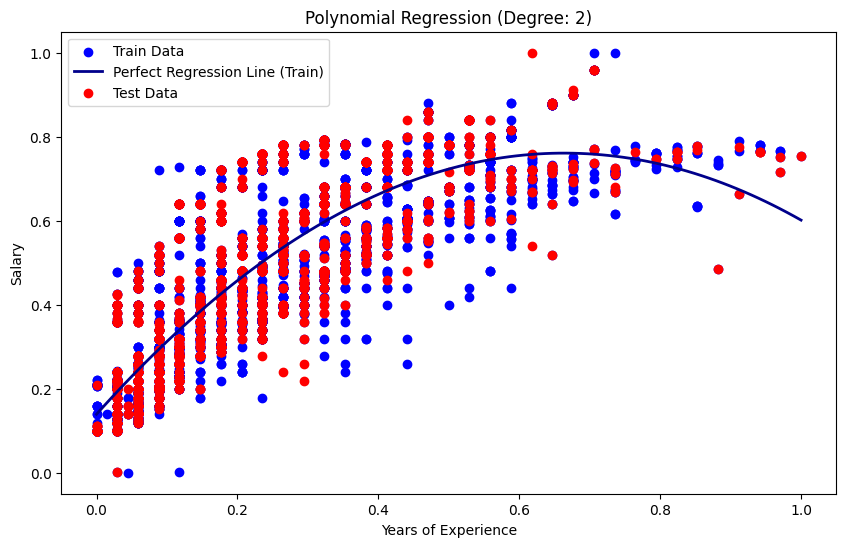

Train RMSE: 0.10912707872189005
Test RMSE: 0.10811737176779689
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.232e+30
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        03:03:24   Log-Likelihood:             1.6764e+05
No. Observations:                5358   AIC:                        -3.353e+05
Df Residuals:                    5355   BIC:                        -3.353e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

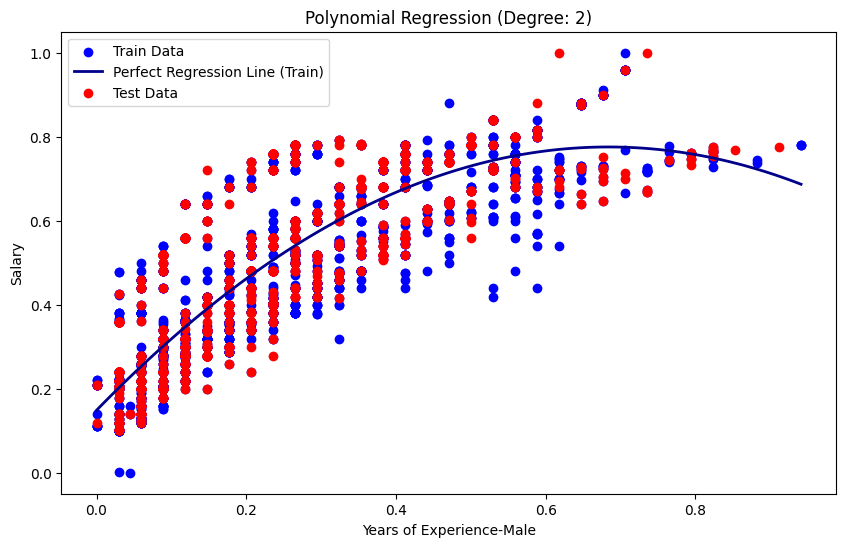

Train RMSE: 0.10349107880408548
Test RMSE: 0.10902743798624175
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.994e+30
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        03:03:24   Log-Likelihood:                 93158.
No. Observations:                2936   AIC:                        -1.863e+05
Df Residuals:                    2933   BIC:                        -1.863e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

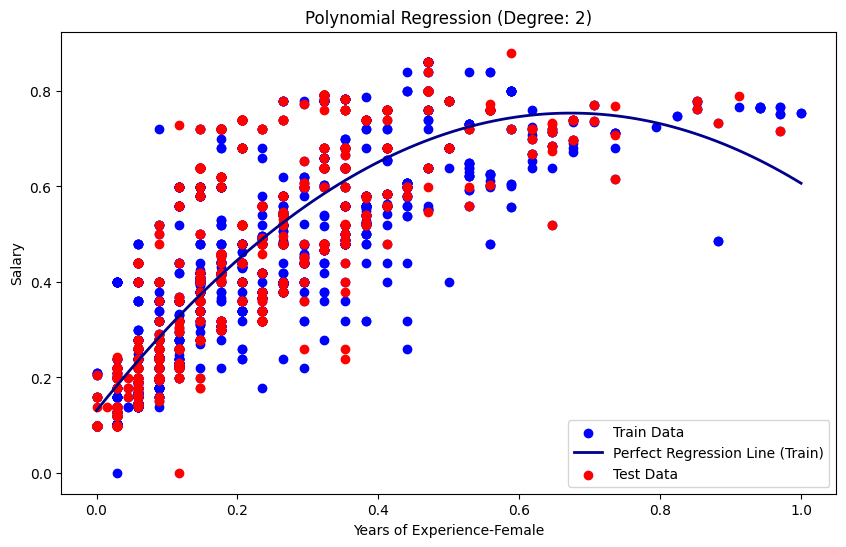

Train RMSE: 0.11186389365515707
Test RMSE: 0.12012697743985584
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.429e+30
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        03:03:24   Log-Likelihood:                 77681.
No. Observations:                2410   AIC:                        -1.554e+05
Df Residuals:                    2407   BIC:                        -1.553e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

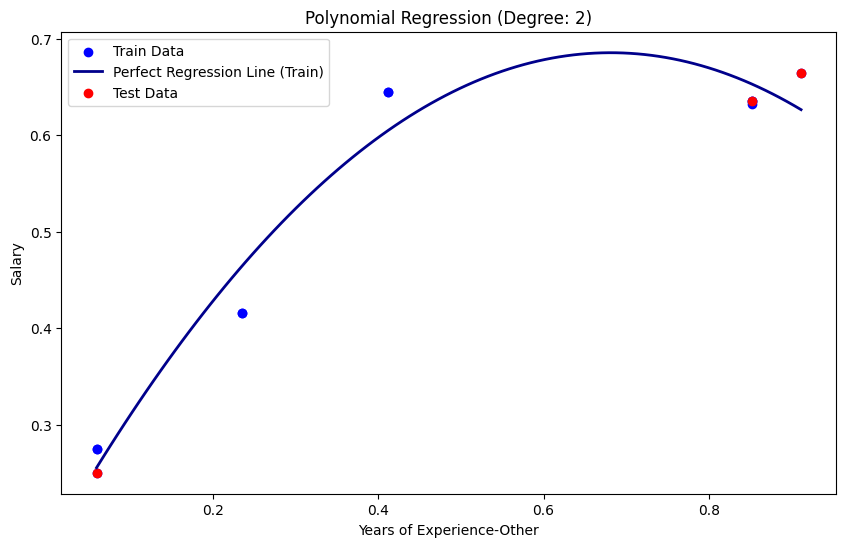

Train RMSE: 0.03199641526692148
Test RMSE: 0.024081688972726206
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.547e+30
Date:                Thu, 28 Nov 2024   Prob (F-statistic):          4.47e-119
Time:                        03:03:24   Log-Likelihood:                 379.10
No. Observations:                  11   AIC:                            -752.2
Df Residuals:                       8   BIC:                            -751.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [9]:
poly_reg = PolynomialRegression(degree=2)
display(scaled.head())
poly_reg.split_data_andbased_on_gender(scaled, 'Years of Experience', 'Salary', 'Years of Experience', 'Salary')
poly_reg.split_data_andbased_on_gender(scaled[scaled['Gender'] == 'Male'], 'Years of Experience', 'Salary', 'Years of Experience-Male', 'Salary')
poly_reg.split_data_andbased_on_gender(scaled[scaled['Gender'] == 'Female'], 'Years of Experience', 'Salary', 'Years of Experience-Female', 'Salary')
poly_reg.split_data_andbased_on_gender(scaled[~scaled['Gender'].isin(['Male', 'Female'])], 'Years of Experience', 'Salary', 'Years of Experience-Other', 'Salary')


#### **Summary**

- We plotted scatter plots to find relationships between features and target feature in this case the salary.
- We found that Age and Years of Experience are the 2 numerical features that we can examine.
- In order to do polynomial regression we considered degree of 2.
- We plotted the graph for 4 different splits of the dataset each further split into test and train datasets of 80% and 20% respectivelu.
- The 4 different splits were based on Gender ie Whole, Male , Female and Others
- We can see from the polynomial curve that we obtained after training the following things
-- The salary increases with age upto a certain threshold and then starts reducing.
-- This is true regardless of gender.
-- The salary is slightly higher for Males when compared to females across all age ranges.
-- The data is not significant enough to come to a conclusion on the other genders.

- Examining the polynomial regression summary we can see that both Age and Years of Experience are good features to predict the Salary.
- The p-value for both are less than 0.05
- We can see that for both the feature in all 8 models the degree 2 coefficient is negative which explains the downward trend towards the higher x axis.
- AIC and BIC are negative for both models which indicates that the model likelihood is high than the penalty.
- R-Squared is 1 even though its ideal we need to recheck if something is wrong in our calculations or model.

We can say that we can see slight gender bias when comparing the salary drawn based on age and years of experience. 

#### **Logistic Regression**

In [33]:
file = "../data/recruitment_dataset.csv"
df_hiring = pd.read_csv(file)
df_hiring = df_hiring.dropna()

row_count = len(df_hiring)

print("Total number of datapoints(rows)", row_count)


print(f"Hired = {len(df_hiring[df_hiring['decision'] == True])}")
print(f"Not Hired = {len(df_hiring[df_hiring['decision'] == False])}")

Total number of datapoints(rows) 4000
Hired = 1267
Not Hired = 2733


#### **Correlation Matrix**

In [22]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """
    Compute Cramér's V statistic for categorical variables.
    
    :param x: Categorical data (series or array)
    :param y: Categorical data (series or array)
    :return: Cramér's V value
    """
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)
    
    # Calculate the chi-squared statistic
    chi2, _, _, _ = chi2_contingency(contingency_table)
    
    # Calculate the Cramér's V value
    n = contingency_table.sum().sum()  # Total number of observations
    k1 = len(contingency_table.columns)  # Number of unique categories in x
    k2 = len(contingency_table.index)    # Number of unique categories in y
    
    # Cramér's V formula
    v = np.sqrt(chi2 / (n * min(k1 - 1, k2 - 1)))
    
    return v

def categorical_correlation_matrix(df, categorical_columns):
    """
    Compute the Cramér's V correlation matrix for categorical columns.
    
    :param df: The DataFrame containing the data
    :param categorical_columns: List of categorical column names to compute the correlation for
    :return: DataFrame with Cramér's V correlation matrix
    """
    # Initialize an empty correlation matrix
    corr_matrix = pd.DataFrame(np.zeros((len(categorical_columns), len(categorical_columns))),
                               columns=categorical_columns, index=categorical_columns)

    # Loop through each pair of categorical columns and compute Cramér's V
    for col1 in categorical_columns:
        for col2 in categorical_columns:
            # Compute Cramér's V and update the matrix
            corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
    
    return corr_matrix

def plot_categorical_correlation_matrix(corr_matrix):
    """
    Plot the Cramér's V correlation matrix as a heatmap.
    
    :param corr_matrix: DataFrame containing the Cramér's V correlation matrix
    :return: None
    """
    plt.figure(figsize=(16, 16))
    sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", cbar=True,
                xticklabels=corr_matrix.columns, yticklabels=corr_matrix.index, 
                annot_kws={"size": 12, "weight": "bold", "color": "black"})
    plt.title("Cramér's V Correlation Matrix for Categorical Columns", fontsize=15)
    plt.xlabel("Categorical Features", fontsize=12)
    plt.ylabel("Categorical Features", fontsize=12)
    plt.show()



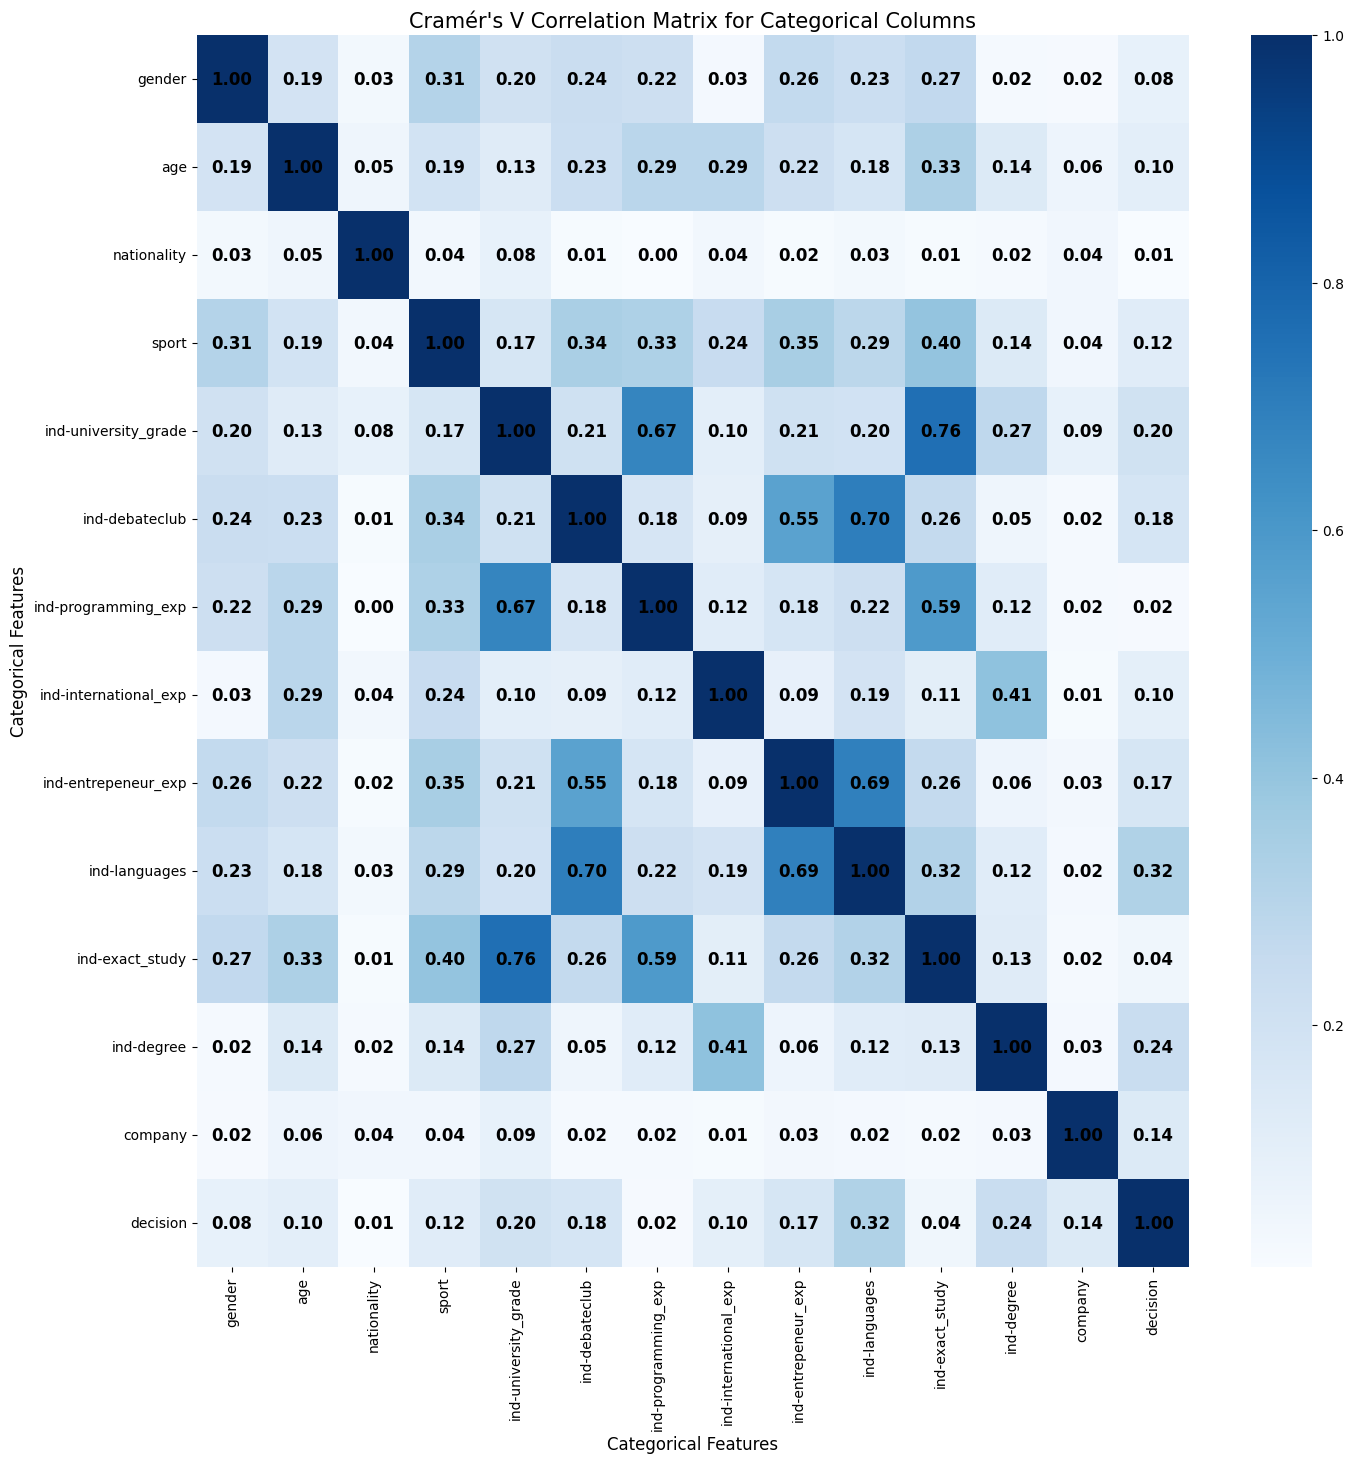

In [23]:
correlation_matrix = categorical_correlation_matrix(df_hiring, ["gender","age","nationality","sport","ind-university_grade","ind-debateclub","ind-programming_exp","ind-international_exp","ind-entrepeneur_exp","ind-languages","ind-exact_study","ind-degree","company","decision"])
plot_categorical_correlation_matrix(correlation_matrix)

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

class LogisticRegressionModel:
    def __init__(self, data, feature_cols, target_col):
        """
        Initialize the LogisticRegressionModel class.

        :param data: DataFrame containing the dataset
        :param feature_cols: List of feature column names
        :param target_col: Name of the target column
        """
        self.data = data
        self.feature_cols = feature_cols
        self.target_col = target_col
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.model = LogisticRegression()
        self.encoder = LabelEncoder()

    def preprocess_data(self):
        """
        Preprocess the data by encoding categorical features into numerical values.
        """
        # Encode categorical columns to numeric values using LabelEncoder
        categorical_cols = [col for col in self.feature_cols if self.data[col].dtype == 'object']
        for col in categorical_cols:
            self.data[col] = self.encoder.fit_transform(self.data[col])

        # Define features and target variable
        self.X = self.data[self.feature_cols]
        self.y = self.data[self.target_col]

    def split_data(self, test_size=0.2, random_state=42):
        """
        Split the data into training and testing sets.

        :param test_size: Proportion of the dataset to include in the test split
        :param random_state: Seed for random number generator
        """
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=test_size, random_state=random_state
        )

    def train_model(self):
        """
        Train the logistic regression model using the training data.
        """
        self.model.fit(self.X_train, self.y_train)

    def predict(self):
        """
        Make predictions on the test data.

        :return: Predictions for the test set
        """
        return self.model.predict(self.X_test)

    def evaluate_model(self, y_pred):
        """
        Evaluate the model by printing accuracy, confusion matrix, and classification report.

        :param y_pred: The predicted values for the test set
        """
        accuracy = accuracy_score(self.y_test, y_pred)
        self.conf_matrix = confusion_matrix(self.y_test, y_pred)
        class_report = classification_report(self.y_test, y_pred)

        print("Accuracy:", accuracy)
        print("Confusion Matrix:\n", self.conf_matrix)
        print("Classification Report:\n", class_report)

    def plot_confusion_matrix(self):
        # Create a heatmap of the confusion matrix
        plt.figure(figsize=(10, 7))
        sns.heatmap(self.conf_matrix, annot=True, fmt="d", annot_kws={"size": 12, "weight": "bold", "color": "black"}, cmap='Blues', xticklabels=['Not Hired', 'Hired'], yticklabels=['Not Hired', 'Hired'])
        plt.title("Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        
        plt.show()

    def run(self):
        """
        Run the complete pipeline: preprocessing, splitting data, training, predicting, and evaluating.
        """
        self.preprocess_data()
        self.split_data()
        self.train_model()
        y_pred = self.predict()
        self.evaluate_model(y_pred)
        self.plot_confusion_matrix()



We will check how well the model is able to predict based on the following major features as a first step
- Gender
- Debate club experience
- University Grade
- Programming Experience
- Degree
- Company

Accuracy: 0.7475
Confusion Matrix:
 [[527  40]
 [162  71]]
Classification Report:
               precision    recall  f1-score   support

       False       0.76      0.93      0.84       567
        True       0.64      0.30      0.41       233

    accuracy                           0.75       800
   macro avg       0.70      0.62      0.63       800
weighted avg       0.73      0.75      0.71       800



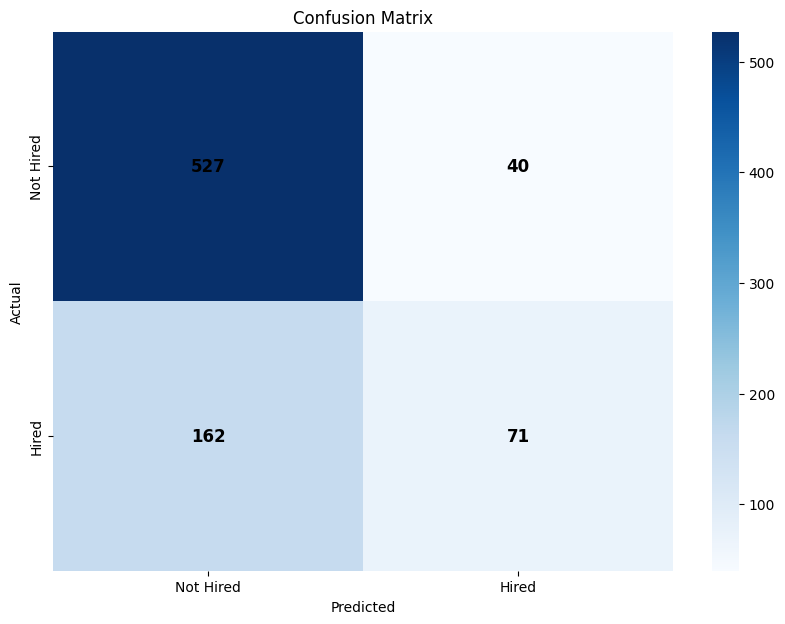

In [27]:
# Define feature columns and target column
feature_cols = [
    'gender', 'ind-debateclub','ind-university_grade',
    'ind-programming_exp',
    'ind-degree', 'company'
]
target_col = 'decision'
# Initialize the LogisticRegressionModel
log_reg_model = LogisticRegressionModel(df_hiring, feature_cols, target_col)
# Run the logistic regression pipeline
log_reg_model.run()

Accuracy: 0.75125
Confusion Matrix:
 [[528  39]
 [160  73]]
Classification Report:
               precision    recall  f1-score   support

       False       0.77      0.93      0.84       567
        True       0.65      0.31      0.42       233

    accuracy                           0.75       800
   macro avg       0.71      0.62      0.63       800
weighted avg       0.73      0.75      0.72       800



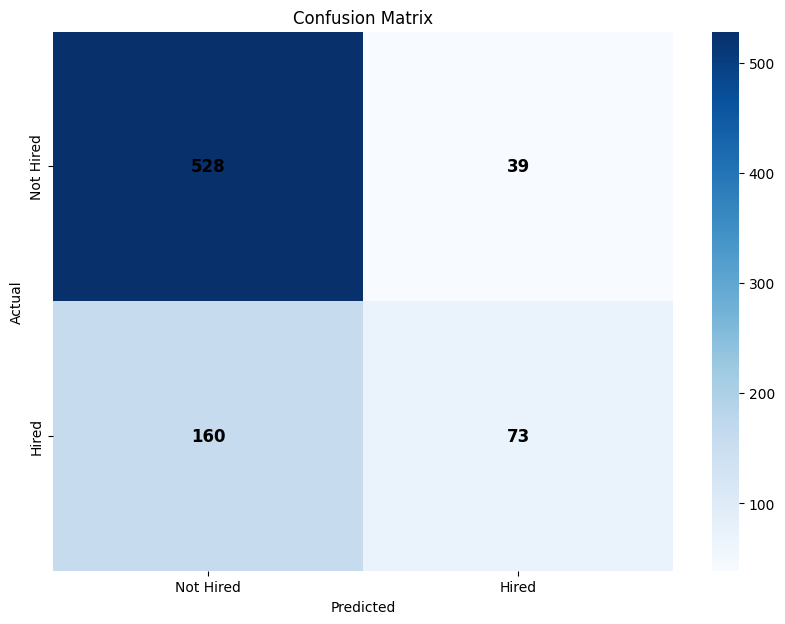

In [28]:
# Define feature columns and target column
feature_cols = [
     'ind-debateclub','ind-university_grade',
    'ind-programming_exp',
    'ind-degree', 'company'
]
target_col = 'decision'
# Initialize the LogisticRegressionModel
log_reg_model = LogisticRegressionModel(df_hiring, feature_cols, target_col)
# Run the logistic regression pipeline
log_reg_model.run()

#### **Summary**

- We chose a dataset which was giving us hiring decisions across 4 companies.
- We created a correlation matrix using Cramer V test. 
- We found out the features that were highly correlated with Hiring Decision.
- Since our analysis is based on Gender and its bias we added it as well.
- It was evident from the correlation matrix itself that Gender was not influencing that much on the hiring decision.
- Gender and Nationality were the least significant features according to the correlation matrix.
- We still trained the logistic model using the 5 top features that were not inter correlated and we achieved an accuracy of 74.75%
- We removed Gender as an independent column and retrained another model 
- If gender is a significant factor in predicting hiring decision then we should see a significant decrease in the accuracy of the model after we removed Gender.
- This wasn't the case. After we removed Gender not only did it decrease it increased slightly as well.
- This means that by logistic regression we can assume that there isno bias based on gender in this particular dataset with 74-75% confidence.